Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgbm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (800, 20)
Testing set shape: (200, 20)


Build, Train, and Tune the LightGBM Classifier


In [4]:
print("\n--- Training LightGBM Classifier ---")
lgbm = lgbm.LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
print("\nBest LightGBM Parameters:", grid_lgbm.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_lgbm.best_score_:.4f}")


--- Training LightGBM Classifier ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Best LightGBM Parameters: {'learning_ra

Build, Train, and Tune the SVM Classifier

In [6]:
print("\n--- Training SVM Classifier ---")
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1],
    'svm__kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("\nBest SVM Parameters:", grid_svm.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_svm.best_score_:.4f}")


--- Training SVM Classifier ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best SVM Parameters: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9463


Evaluate and Compare Models

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Test Set Evaluation ---
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        99
           1       0.90      0.94      0.92       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


--- SVM Test Set Evaluation ---
Accuracy: 0.9400
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        99
           1       0.93      0.95      0.94       101

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



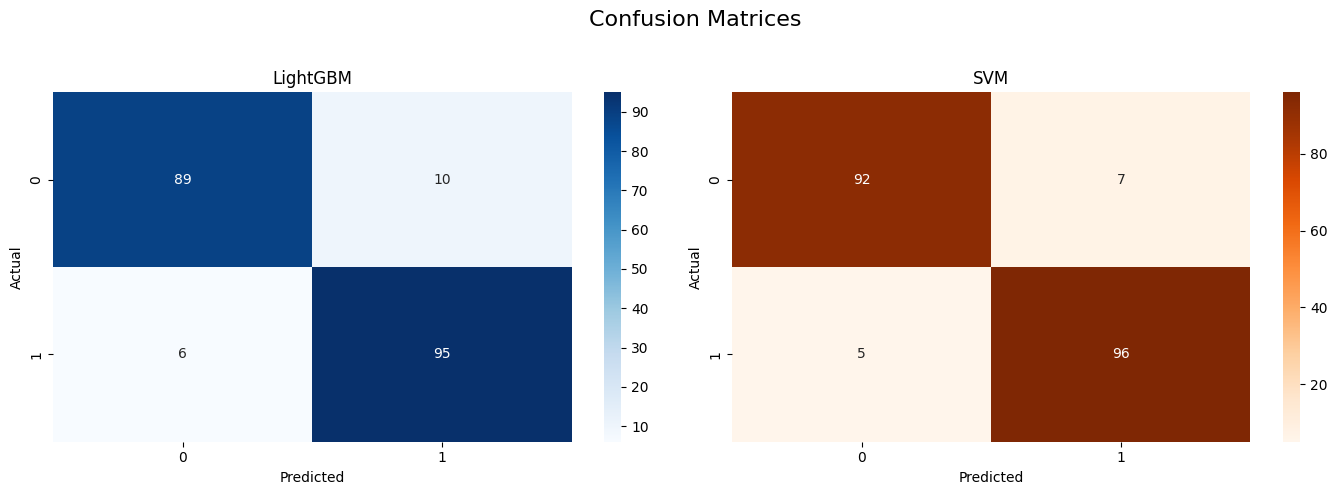

In [7]:
y_pred_lgbm = best_lgbm.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
print("\n--- LightGBM Test Set Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\n--- SVM Test Set Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Confusion Matrices', fontsize=16)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('LightGBM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 Save the Trained Models

In [8]:
joblib.dump(best_lgbm, 'lightgbm_earthquake_model.pkl')
joblib.dump(best_svm, 'svm_earthquake_model.pkl')

print("\nModels saved successfully:")
print(" - lightgbm_earthquake_model.pkl")
print(" - svm_earthquake_model.pkl")


Models saved successfully:
 - lightgbm_earthquake_model.pkl
 - svm_earthquake_model.pkl
